In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [6]:
release_dates.dtypes

title              object
year                int64
country            object
date       datetime64[ns]
dtype: object

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

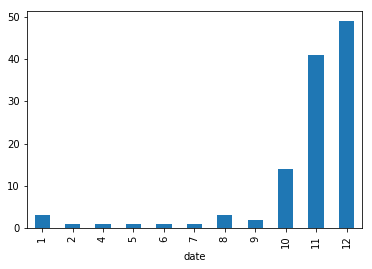

In [18]:
a=release_dates[(release_dates.title.str.contains("Christmas")) & (release_dates.country=="USA") ]
a.groupby(a.date.dt.month).size().plot(kind="bar")


### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

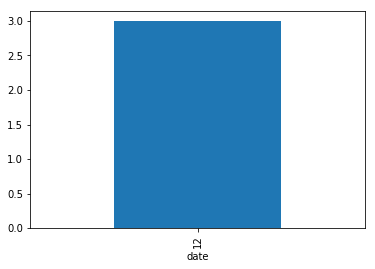

In [19]:
a=release_dates[(release_dates.title.str.startswith("The Hobbit")) & (release_dates.country=="USA") ]
a.groupby(a.date.dt.month).size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

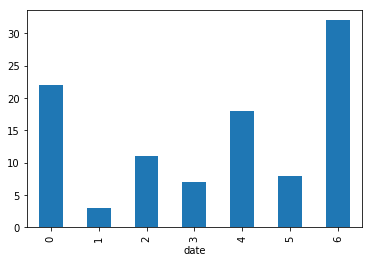

In [21]:
a=release_dates[(release_dates.title.str.contains("Romance")) & (release_dates.country=="USA") ]
a.groupby(a.date.dt.dayofweek).size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

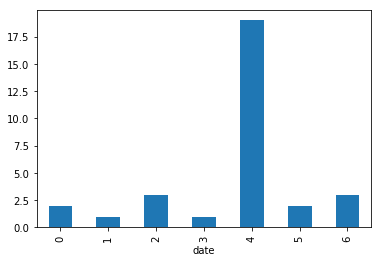

In [22]:
a=release_dates[(release_dates.title.str.contains("Action")) & (release_dates.country=="USA") ]
a.groupby(a.date.dt.dayofweek).size().plot(kind="bar")

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [33]:
c=cast[(cast.name=="Judi Dench") & (cast.year//10*10==1990)]
c=c.merge(release_dates)
c[c.country=="USA"]

,title,year,name,type,character,n,country,date
1,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
40,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
71,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
78,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
101,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
147,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
173,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19
246,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

In [73]:
c=cast[(cast.name=="Judi Dench")]
c=c.merge(release_dates)
c=c[c.country=="USA"]
c.sort_values("year").set_index("title").date.dt.month

title
A Study in Terror                               8
Wetherby                                        7
84 Charing Cross Road                           2
A Handful of Dust                               6
Henry V                                        11
Jack & Sarah                                    3
GoldenEye                                      11
Hamlet                                         12
Tomorrow Never Dies                            12
Mrs Brown                                      10
Shakespeare in Love                             1
The World Is Not Enough                        11
Tea with Mussolini                              5
Chocolat                                        1
The Shipping News                               1
Iris                                            3
Die Another Day                                11
The Importance of Being Earnest                 6
Home on the Range                               4
Ladies in Lavender                          

### In which months do films with Tom Cruise tend to be released in the USA?

In [76]:
c=cast[(cast.name=="Tom Cruise")]
c=c.merge(release_dates)
c[c.country=="USA"].sort_values("year").set_index("title").date.dt.month

title
Taps                                                  12
Endless Love                                           7
All the Right Moves                                   10
The Outsiders                                          3
Losin' It                                              4
Risky Business                                         8
Legend                                                 4
Top Gun                                                5
The Color of Money                                    10
Rain Man                                              12
Cocktail                                               7
Born on the Fourth of July                             1
Days of Thunder                                        6
Far and Away                                           5
A Few Good Men                                        12
The Firm                                               6
Interview with the Vampire: The Vampire Chronicles    11
Mission: Impossible      